In [1]:
# import needed libraries
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path)

import rvesimulator
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.simulators.asca_rve import AscaRVE

In [2]:
# define the design space
doe_variables = OrderedDict({"vol_req": 0.30})

# define number of samples
num_points = 3
# define the information of outputs
name_outputs = ["vol_frac", "stress", "strain"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)

print(doe_sampler.data)

{'samples':    vol_req
0      0.3
1      0.3
2      0.3, 'responses':   vol_frac stress strain
0      NaN    NaN    NaN
1      NaN    NaN    NaN
2      NaN    NaN    NaN}


In [3]:
simulation_wrapper = AscaRVE()
simulation_wrapper.update_sim_info(
    print_info=True, mesh_partition=100, num_cpu=6, radius_mu=0.003, radius_std=0.0003,
)
data = simulation_wrapper.run_simulation(data=doe_sampler.data)
print(data)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0.0003}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.05, 0.0, 0.0], 'simulation_time': 1.0, 'num_cpu': 6, 'platform': 'ubuntu'} 

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s
micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/asca_rve/Data/point_0
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


the simulation time is :40.00669980049133 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 60.08433675765991
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


Time of generate the 2D RVE with volume fraction            = 0.30  is 0.01 s
micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/asca_rve/Data/point_1
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


the simulation time is :40.00833296775818 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 60.083234786987305
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s
micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/asca_rve/Data/point_2
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


the simulation time is :40.00848174095154 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 60.08526802062988
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


{'samples':    vol_req
0      0.3
1      0.3
2      0.3, 'responses':    vol_frac                                             stress  \
0  0.311712  [[[0.0, 0.0], [0.0, 0.0]], [[0.222887553218320...   
1  0.300336  [[[0.0, 0.0], [0.0, 0.0]], [[0.219444813383457...   
2   0.30695  [[[0.0, 0.0], [0.0, 0.0]], [[0.233897187470733...   

                                              strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.005012501759907...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.005012499896435...  
2  [[[0.0, 0.0], [0.0, 0.0]], [[0.005012499891408...  }


[Text(0.5, 0, '$\\epsilon_{xx}$'), Text(0, 0.5, '$\\sigma_{xx}$ (MPa)')]

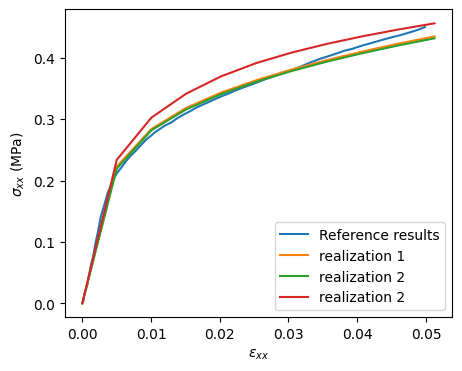

In [4]:
import pandas as pd 
samples = data["samples"]
respones = data["responses"]
exp_data = pd.read_csv("Original data.csv", header=None)
pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")

fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.plot(exp_data.loc[:, 0], exp_data.loc[:, 1], label="Reference results")
ax.plot(
    respones["strain"][0][:, 0, 0],
    respones["stress"][0][:, 0, 0],
    label="realization 1",
)
ax.plot(
    respones["strain"][1][:, 0, 0],
    respones["stress"][1][:, 0, 0],
    label="realization 2",
)
ax.plot(
    respones["strain"][2][:, 0, 0],
    respones["stress"][2][:, 0, 0],
    label="realization 2",
)
ax.legend()
ax.set(**pparam)

